In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("car_data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nInfo:")
print(df.info())

print("\nMissing values:\n", df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

Shape: (301, 9)

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0

In [4]:
# Create a copy to avoid confusion
data = df.copy()

# Create a new feature: Car_Age
current_year = data["Year"].max() + 1
data["Car_Age"] = current_year - data["Year"]

# Drop Year (we replaced it with Car_Age)
data = data.drop("Year", axis=1)

# Optional: Drop Car_Name or keep it (we'll drop it to simplify)
data = data.drop("Car_Name", axis=1)

data.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


In [5]:
X = data.drop("Selling_Price", axis=1)  # features
y = data["Selling_Price"]               # target

In [6]:
categorical_cols = ["Fuel_Type", "Selling_type", "Transmission"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: ['Fuel_Type', 'Selling_type', 'Transmission']
Numeric columns: ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']


In [7]:
# One-hot encode categorical features
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# Build full pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 240
Test size: 61


In [9]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission']),
                                                 ('num', 'passthrough',
                                                  ['Present_Price',
                                                   'Driven_kms', 'Owner',
                                                   'Car_Age'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [10]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 0.6423655737704909
R² Score: 0.9583759546741363


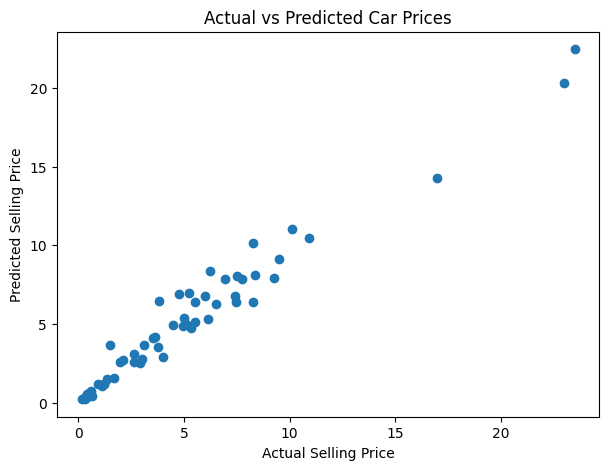

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [12]:
# Example new car details
new_car = pd.DataFrame({
    'Present_Price': [6.0],        # in lakhs
    'Driven_kms': [30000],
    'Fuel_Type': ['Petrol'],       # 'Petrol' / 'Diesel' / 'CNG'
    'Selling_type': ['Dealer'],    # 'Dealer' / 'Individual'
    'Transmission': ['Manual'],    # 'Manual' / 'Automatic'
    'Owner': [0],                  # 0, 1, 2, etc.
    'Car_Age': [5]                 # age in years
})

predicted_price = model.predict(new_car)
print("Predicted Selling Price (in lakhs):", round(predicted_price[0], 2))


Predicted Selling Price (in lakhs): 4.67
